In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("Customer Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
#replacing blanks with 0 as tenure is 0 and no total charges are recorded 
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [7]:
def convert(value):
    if value == 1:
        return "yes"
    else:
        return "no"

df['SeniorCitizen'] = df["SeniorCitizen"].apply(convert)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
#checking for null values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
#checking for null values in primary key column 
df["customerID"].duplicated().sum()

0

In [11]:
# Statistic descriptive
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


- The average customer stayed with the company for **32 months**, and **75%** of customers have a tenure of **55 months**.
- Average monthly charges are **USD 64.76**, and **25%** of customers pay more than **USD 89.85**.
- Average Total charges are **USD 2279.73**, and **25%** of customers pay more than **USD 3786.60**.



## Target Variable Visualization

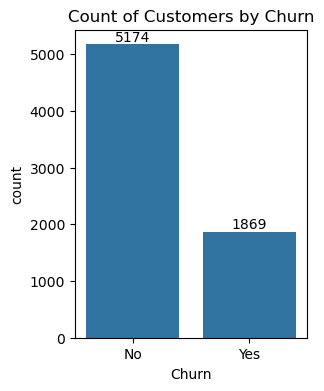

In [30]:
plt.figure(figsize=(3,4))
ax = sns.countplot(x="Churn", data=df)

ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Churn")

plt.show()

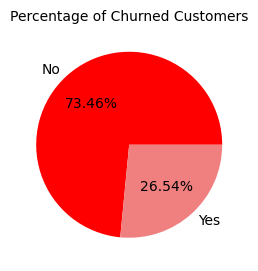

In [22]:
plt.figure(figsize=(3, 4))
gb = df.groupby("Churn").agg({'Churn': "count"})
colors = ['red', 'lightcoral'] 
plt.pie(gb['Churn'], labels=gb.index, autopct="%1.2f%%", colors=colors)
plt.title("Percentage of Churned Customers", fontsize=10)
plt.show()

*From the given pie chart we can conclude that ***26.54%*** of customers have churned out.*

## Analysing Services for Each Customer

In [23]:
import math

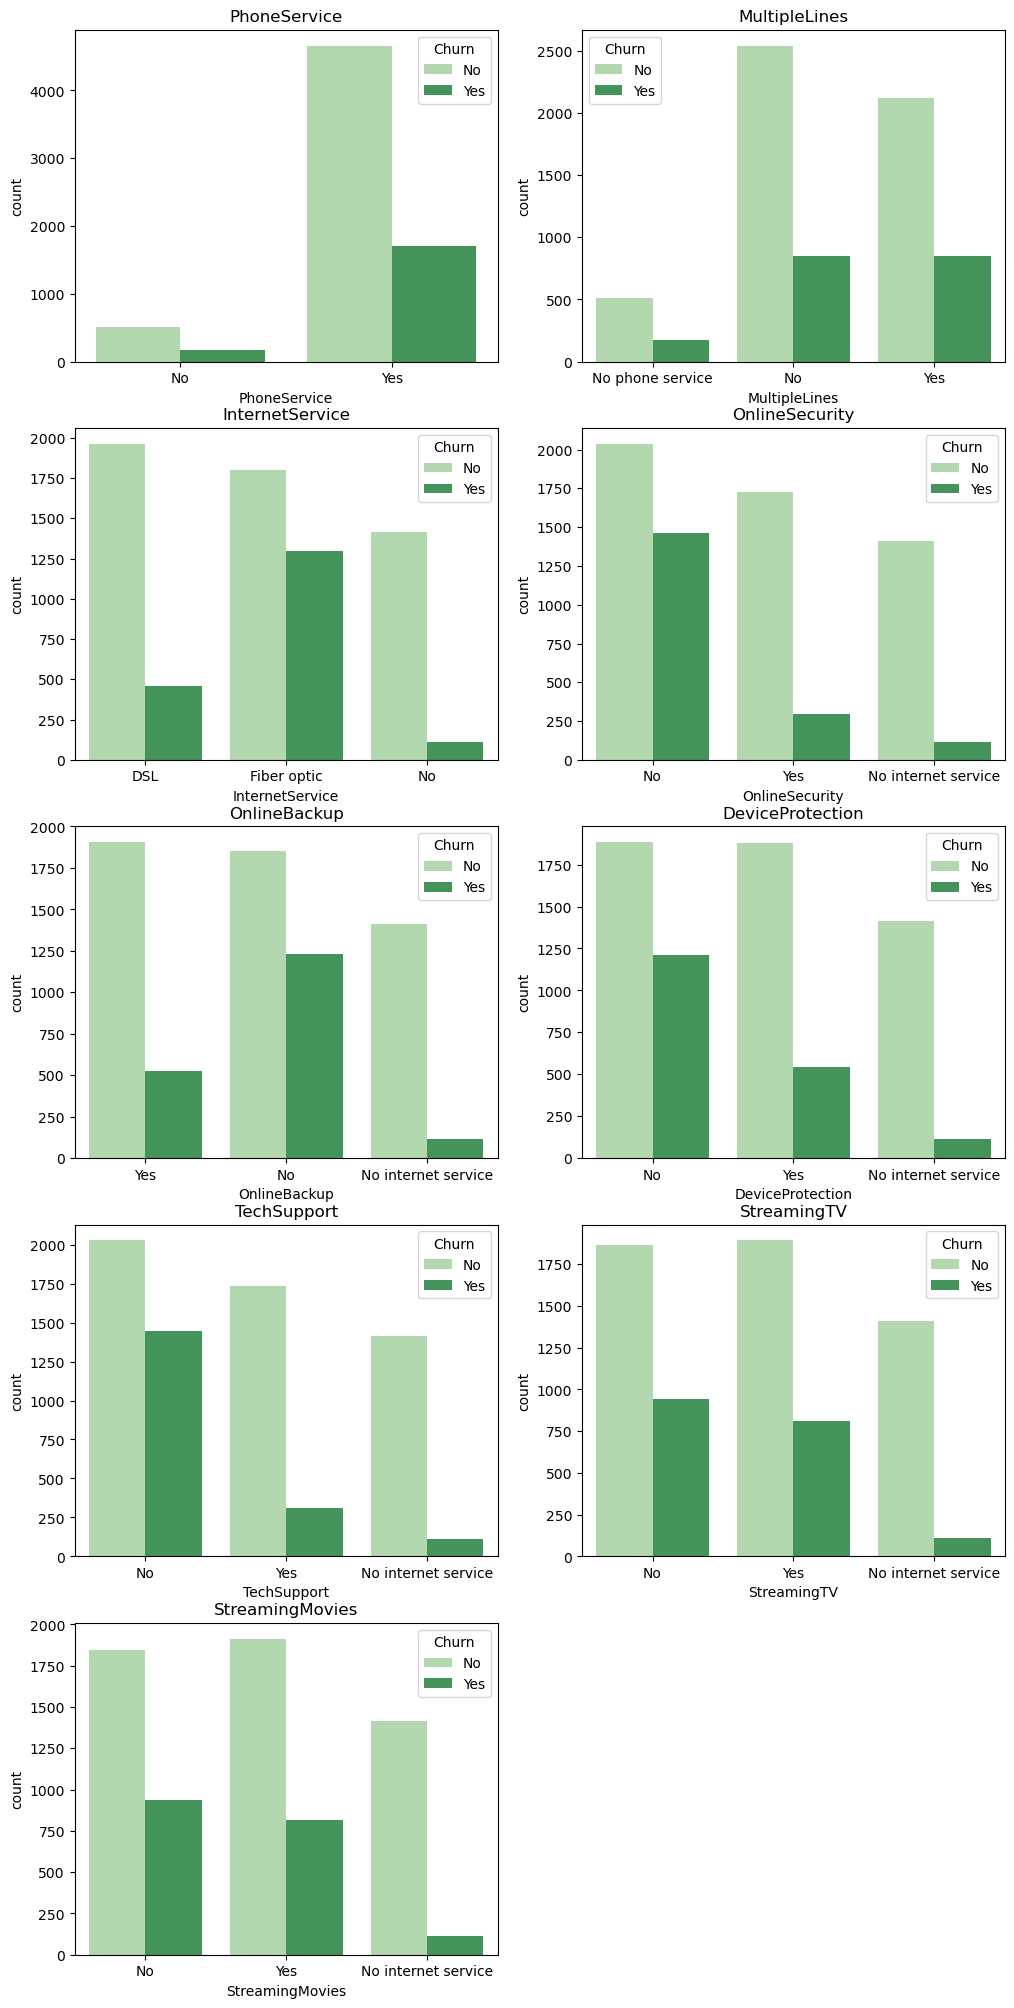

In [18]:
def plot_categorical_to_target(df,categorical_values, target):
    number_of_columns = 2
    number_of_rows = math.ceil(len(categorical_values)/2)
    
    fig = plt.figure(figsize = (12, 5*number_of_rows))
    
    for index, column in enumerate(categorical_values, 1):
        ax = fig.add_subplot(number_of_rows,number_of_columns,index)
        ax = sns.countplot(x = column, data = df, hue = target, palette="Greens")
        ax.set_title(column)
        
        if column == "PaymentMethod":
            plt.xticks(rotation=45)
    return plt.show()

customer_services = ["PhoneService","MultipleLines","InternetService","OnlineSecurity","OnlineBackup",
                    "DeviceProtection","TechSupport","StreamingTV","StreamingMovies"]
plot_categorical_to_target(df,customer_services, "Churn")

- The moderately higher churn rate for customers who have the **phone service**.
- Customers with **internet service fiber optic** have a higher churn rate compared with **DSL** and **No**.
- The much higher churn rate for customers without **online security**.
- Customers who don’t have access to **tech support** tend to leave more frequently than those who do.
- Customers without **online backup** and **device protection** have a higher churn rate.


## Analysing Customer Account Information — Categorical Variables

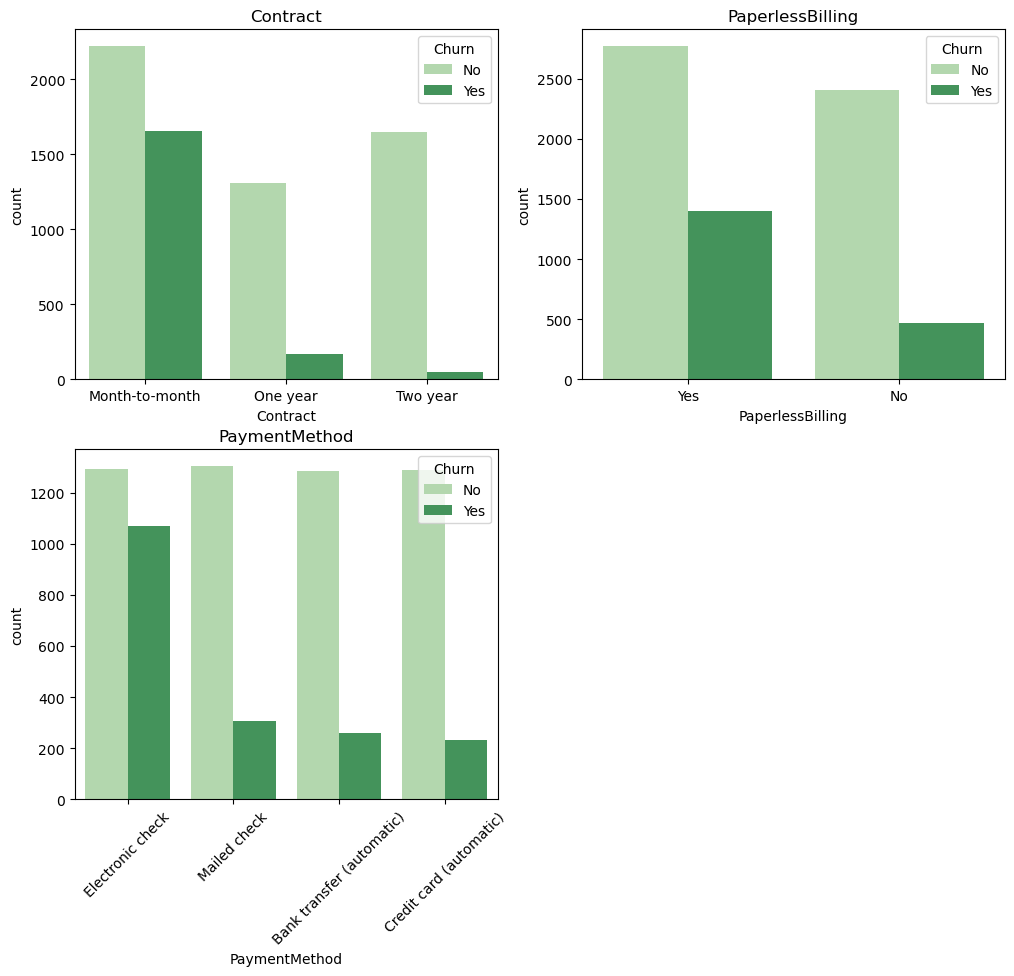

In [20]:
customer_account_cat = ["Contract","PaperlessBilling","PaymentMethod"]

plot_categorical_to_target(df,customer_account_cat,"Churn")


- Customers are more likely to churn with **month-to-month contracts**.
- Moderately higher churn rate with **electronic check** payment method.
- Customers with **paperless billing** have higher churn rates.


## Analysing Customer Account Information — Numerical Variables

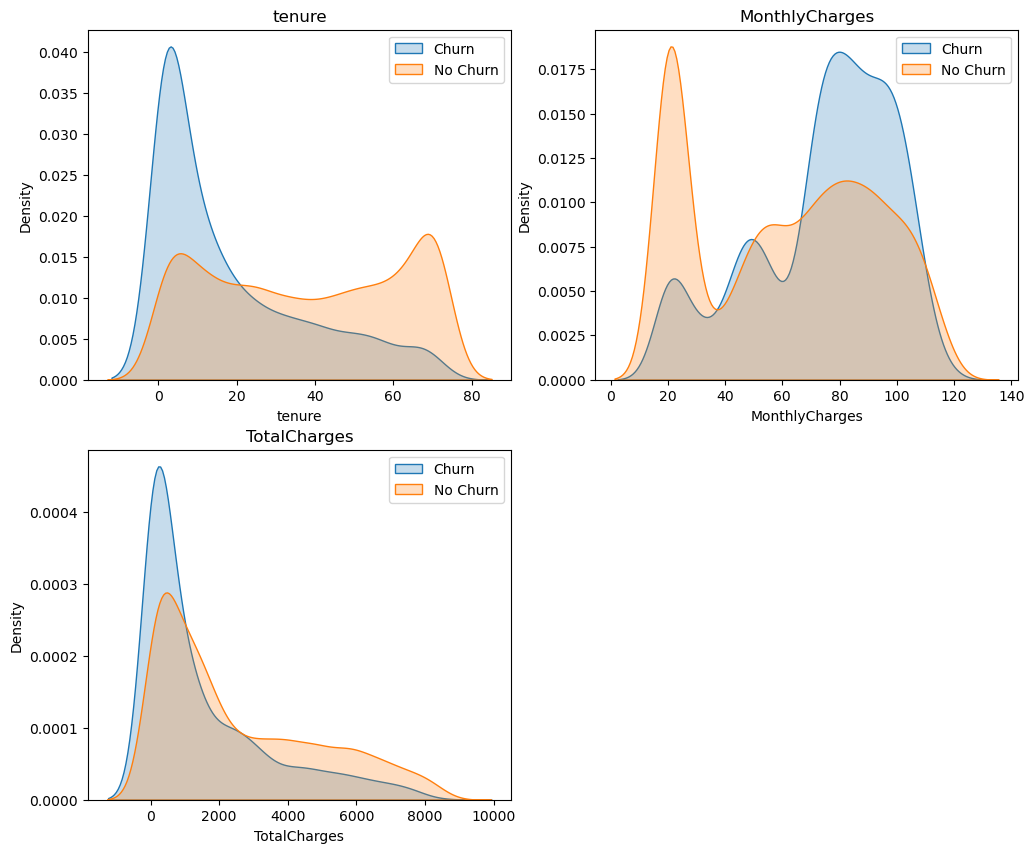

In [26]:
def histogram_plots(df, numerical_values, target):
    number_of_columns = 2
    number_of_rows = math.ceil(len(numerical_values)/2)
    
    fig = plt.figure(figsize=(12,5*number_of_rows))
    
    for index, column in enumerate(numerical_values,1):
        ax = fig.add_subplot(number_of_rows, number_of_columns, index)
        ax = sns.kdeplot(df[column][df[target]=="Yes"] ,fill = True)
        ax = sns.kdeplot(df[column][df[target]=="No"], fill = True)
        ax.set_title(column)
        ax.legend(["Churn","No Churn"], loc='upper right')
    return plt.show()

customer_account_num = ["tenure", "MonthlyCharges","TotalCharges"]
histogram_plots(df,customer_account_num, "Churn")

- Customers with **short tenure** are more likely to churn.
- Customers who **paid more on monthly charges** have higher churn rates.
- Customers with **high total charges** tend to churn.


## Analysing Customer's Demographic Info

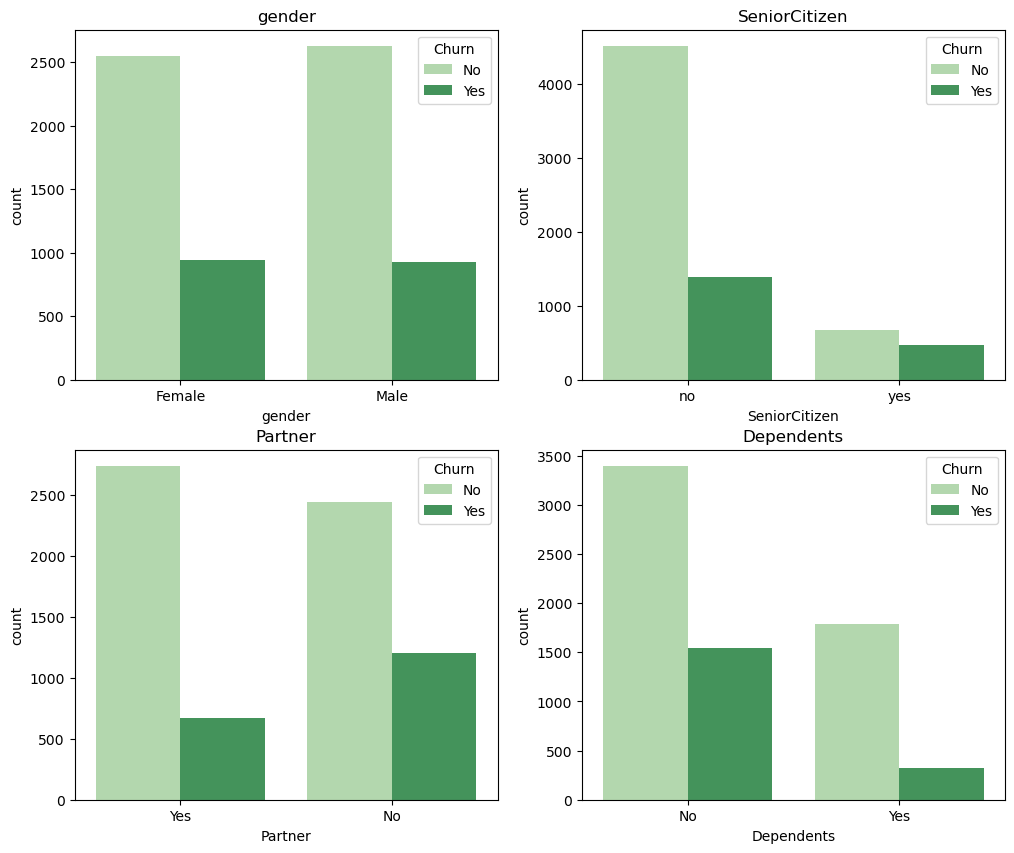

In [27]:
customer_demographic_cat = ["gender","SeniorCitizen","Partner","Dependents"]
plot_categorical_to_target(df,customer_demographic_cat,"Churn")

- **Churn** and **no churn** show no significant differences for each **gender**.
- **Young customers** are more likely to churn compared to **old customers**.
- Customers with a **partner** are less likely to churn compared to those **without a partner**.


## Outlier detection

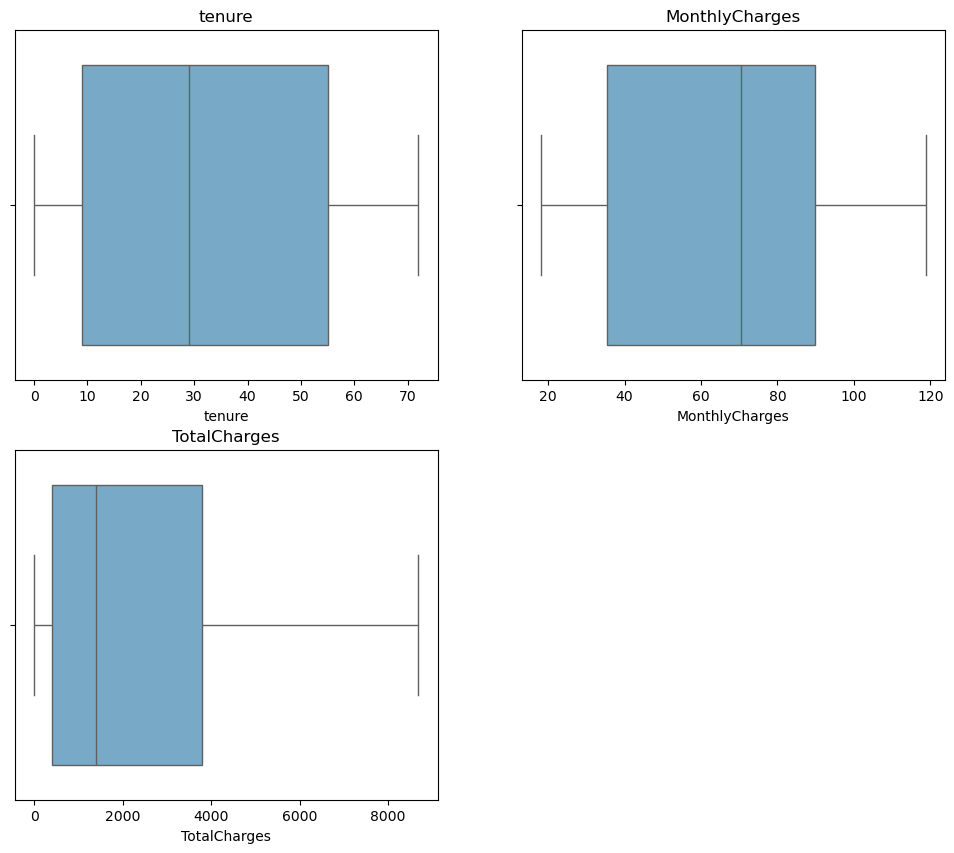

In [24]:
def outlier_check(df,numerical_values):
    number_of_columns = 2
    number_of_rows = math.ceil(len(numerical_values)/2)
    
    fig = plt.figure(figsize=(12,5*number_of_rows))
    for index, column in enumerate(numerical_values, 1):
        ax = fig.add_subplot(number_of_rows, number_of_columns, index)
        ax = sns.boxplot(x = column, data = df, palette = "Blues")
        ax.set_title(column)
    return plt.show()
numerical_values = ["tenure","MonthlyCharges","TotalCharges"]
outlier_check(df,numerical_values)

*From boxplots, we can take a conclusion that each numerical variable doesn’t have an outlier.*

## Conclusion